expver = 5 -> 1950 to 1978 and 2020 to present

expver = 1 -> 1979 to 2019

[Degree resulution to area](https://www.engr.scu.edu/~emaurer/tools/calc_cell_area_cgi.pl)

for 23lat = $705km^2$

[plot](https://dwikita-ichsana.medium.com/meteorology-101-how-to-download-and-plot-meteorological-data-from-era5-dcbf12553d6a)


---
Method: Reprojecting the layer(shape file)
1. Open your QGIS project and add the polygon shapefile.
2. Right-click on the layer in the Layer list and select "Set Layer CRS."
3. In the "Set Layer CRS" window, search for "UTM 46N" or type the EPSG code for the specific UTM 46N projection you are using (e.g., EPSG:32746).
4. Make sure the selected CRS matches the actual projection of your shapefile.
5. Click "OK" to apply the CRS.
6. Right-click on the layer again and select "Save As..."
7. In the "Save As" window, select a new file name and location for the converted shapefile.
8. Under "CRS," choose "WGS84" (EPSG:4326).
9. Uncheck the "Add layer to map" option to avoid duplicate layers.
10. Click "Save" to create the new shapefile in WGS84.


There is a flaw inside my code , i think which should be later addressed if used in important projects. But this flaw does not effect in normal cases. but i dont know what will happen in other some irregular data.


**Appicable for 0.25 degree grid size. change the grid size if needed.**

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import pandas as pd
import geopandas as gpd
import rasterio
# import cdsapi
# c = cdsapi.Client()

In [3]:
# finding the extend of a shape file
# gdf = gpd.read_file(r"C:\Users\User\Desktop\HEC-HMS\Hec-Hms Project\New folder\new_temp.shp")
# extent = gdf.geometry.total_bounds
# print(extent)
# right_down_corver, left_up_corner = extent[:2], extent[2:]
# right_down_corver, left_up_corner


# find extend of raster file
# def get_extent(input_path):
#     with rasterio.open(input_path) as src:
#         return src.bounds

# input_path = r"C:\Users\User\Desktop\basin delineation\hechms\dem\DEM.tif"
# bounds = get_extent(input_path)
# bounds = (max(bounds.bottom, bounds.top), min(bounds.left, bounds.right), min(bounds.top, bounds.bottom), max(bounds.left, bounds.right))
# bounds = list(bounds)
# bounds

In [4]:
# c.retrieve(
#     'reanalysis-era5-single-levels',
#     {
#         'product_type': 'reanalysis',
#         'format': 'netcdf',
#         'variable': [
#             '2m_temperature', 'evaporation', 'total_precipitation',
#         ],
#         'year': [
#             '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'
#         ],
#         'month': [
#             '01', '02', '03',
#             '04', '05', '06',
#             '07', '08', '09',
#             '10', '11', '12',
#         ],
#         'day': [
#             '01', '02', '03',
#             '04', '05', '06',
#             '07', '08', '09',
#             '10', '11', '12',
#             '13', '14', '15',
#             '16', '17', '18',
#             '19', '20', '21',
#             '22', '23', '24',
#             '25', '26', '27',
#             '28', '29', '30',
#             '31',
#         ],
#         'time': [
#             '00:00', '01:00', '02:00',
#             '03:00', '04:00', '05:00',
#             '06:00', '07:00', '08:00',
#             '09:00', '10:00', '11:00',
#             '12:00', '13:00', '14:00',
#             '15:00', '16:00', '17:00',
#             '18:00', '19:00', '20:00',
#             '21:00', '22:00', '23:00',
#         ],
#         'area': bounds,
#     },
#     'era5.nc')

In [5]:
# read the netcdf file
ds2 = xr.open_dataset(
    r"C:\Users\User\Desktop\HEC-HMS\Hec-Hms Project\parameter\21-24.nc",
    decode_times=True,
)
ds2

<xarray.Dataset>
Dimensions:    (longitude: 13, latitude: 13, expver: 2, time: 26920)
Coordinates:
  * longitude  (longitude) float32 87.99 88.24 88.49 88.74 ... 90.49 90.74 90.99
  * latitude   (latitude) float32 25.99 25.74 25.49 25.24 ... 23.49 23.24 22.99
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2021-01-01 ... 2024-01-27T15:00:00
Data variables:
    t2m        (time, expver, latitude, longitude) float32 ...
    e          (time, expver, latitude, longitude) float32 ...
    tp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-01 17:34:29 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
# np.alltrue(~np.isnan(ds2['tp'].values))

In [7]:
# finding all the point locations that are within  the boundaries
longitudes = ds2["longitude"].values
len_long = len(longitudes)
latitudes = ds2["latitude"].values
len_lat = len(latitudes)

points = []

for lon in longitudes:
    for lat in latitudes:
        points.append((lon, lat))

lat_long = np.array(points).reshape((len_lat, len_long, 2))
lat_long.shape

(13, 13, 2)

In [8]:
# extracting point from basin shape file (just used for plotting)
gdf = gpd.read_file(r"C:\Users\User\Desktop\HEC-HMS\Hec-Hms Project\parameter\Sub-Basin-Corrected\Sub_basin(WGS)_2.shp")
geometries = gdf["geometry"]
subbasin_name = gdf["name"]

coordinates = []
# coordinates_basins = []
for geometry in geometries:
    if geometry.geom_type == 'Polygon':
        for point in geometry.exterior.coords[:]:
            coordinates.append(list(point))
    elif geometry.geom_type == 'MultiPolygon':
        for polygon in geometry.geoms:
            for point in polygon.exterior.coords[:]:
                coordinates.append(list(point))
    # coordinates_basins.append(coordinates)
    # print(type(coordinates))
    # break
    # coordinates = []
    # break
# coordinates_basins
point_of_geometry = np.array(coordinates)
point_of_geometry.shape

(67400, 2)

In [9]:
# here is the flaw. I have increase the coordinate by 0.25 degree, because grid size is 0.25 degree. but in other cases grid may not 0.25 degree. 
# And also ther may be irregular grid size. 
# And also this portion of the code should be re-considered later.  

# creating rectangle around the data points
def create_rect(point, diff):
    return (
        [point[0] - diff, point[1] + diff],
        [point[0] + diff, point[1] + diff],
        [point[0] + diff, point[1] - diff],
        [point[0] - diff, point[1] - diff],
    )


rects = []
for point in lat_long.reshape(-1, 2):
    rects.append(list(create_rect(point, 0.25 / 2)))
rects = np.array(rects)
rects = rects.reshape(len_lat, len_long, 4, 2)
rects.shape

(13, 13, 4, 2)

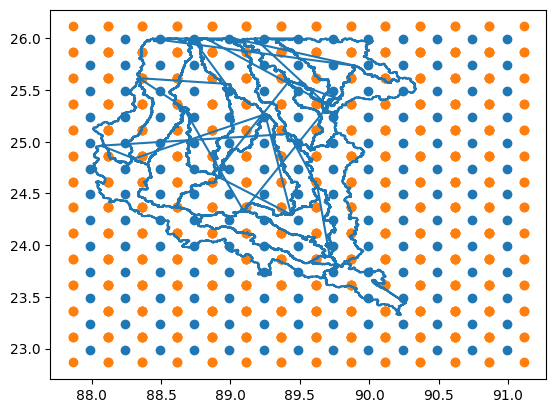

In [10]:
# plotting of the data points
x, y = lat_long[:, :, 0], lat_long[:, :, 1]
plt.scatter(x, y)

# plotting of the rectangles
x, y = rects[:, :, :, 0], rects[:, :, :, 1]
plt.scatter(x, y)

# plotting of the sub-basins
x_p, y_p = point_of_geometry[:, 0], point_of_geometry[:, 1]
plt.plot(x_p, y_p)

plt.show()

In [11]:
def find_area_between_polygon(polygon1, polygon2):
    intersection = polygon1.intersection(polygon2)
    return intersection.area

In [12]:
timestep = ds2['t2m'].values.shape[0]
datetime_series = pd.Series(ds2['time'][0:timestep])
datetime_series = np.array(datetime_series, dtype=object)
# datetime_series

In [13]:
def extract_variable(var_name):
    one_basin_var = np.zeros((timestep, 1))
    all_basins_var = datetime_series.reshape((-1, 1))

    if var_name == 't2m':
        var_matrix = ds2[var_name].values - 273.15
    else:
        var_matrix = ds2[var_name].values * 1000  
    # print(var_matrix.shape)
    # return
    if len(var_matrix.shape) == 3:
        pass
    elif len(var_matrix.shape) == 4:
        var_matrix = var_matrix[~np.isnan(var_matrix)].reshape((timestep, len_lat, len_long)) # remove all the nan values and reduced the expver dimension

    # find the var of all the sub-basins
    for geometry, name in zip(geometries, subbasin_name):
        print(name)
    # find the var of one sub-basin
        for i in range(len_lat):
            for j in range(len_long):
                one_var_values = var_matrix[:, i, j].reshape(-1, 1)

                one_rect = Polygon(rects[i, j])
                rectangle_area = one_rect.area
                # print(rectangle_area)

                intersection_area = find_area_between_polygon(geometry, one_rect)
                # print(intersection_area)
                weight = (intersection_area / rectangle_area)
                # print(weight)
                if var_name == "t2m":
                    if weight == 0:
                        weight = 0
                    else: 
                        weight = 1
                
                weighted_var = weight * one_var_values

                one_basin_var = np.concatenate((one_basin_var, weighted_var.reshape(-1, 1)), axis=1)

        if var_name == 't2m':
            zeros_count_per_row = (one_basin_var == 0).sum(axis=1).reshape(-1, 1) - 1
        else:
            zeros_count_per_row = 1
        # print(zeros_count_per_row.shape)
        one_basin_var = np.sum(one_basin_var, axis=1).reshape(-1, 1)/(zeros_count_per_row)  # summing for all the grid
        # print(one_basin_var)
        all_basins_var = np.concatenate((all_basins_var, one_basin_var), axis=1) 
        one_basin_var = np.zeros((timestep, 1)) #resetting the initial values

    column_name = ['Date'] + subbasin_name.tolist()
    df = pd.DataFrame(all_basins_var, columns=column_name)
    return df


In [14]:
# df_tp_17_20 = extract_variable('e')

In [15]:
import time
start_time = time.time()
df = extract_variable('tp')
end_time = time.time()
execution_time = end_time - start_time
print(f"The line took {execution_time} seconds to execute.")

Subbasin-1
Subbasin-2
Subbasin-3
Subbasin-4
Subbasin-5
Subbasin-6
Subbasin-7
Subbasin-8
Subbasin-9
Subbasin-10
Subbasin-11
Subbasin-12
Subbasin-13
Subbasin-14
Subbasin-15
Subbasin-16
Subbasin-17
Subbasin-18
Subbasin-19
Subbasin-20
Subbasin-21
The line took 51.78226900100708 seconds to execute.


In [16]:
df_tp_21_24 = extract_variable('tp')

Subbasin-1
Subbasin-2
Subbasin-3
Subbasin-4


KeyboardInterrupt: 

In [ ]:
# plt.plot(df_tp_21_24['Date'], df_tp_21_24.iloc[:, 1])

In [ ]:
# merged_df = pd.concat([df_tp_17_20, df_tp_21_24], ignore_index=True)

In [ ]:
# # for averaging the data(t2m)

t2m = ds2['t2m'].values
var_matrix = t2m[~np.isnan(t2m)].reshape((timestep, len_lat, len_long)) - 273.15 # remove all the nan values and reduced the expver dimension
var_matrix = np.average(var_matrix, axis=(1, 2)).reshape(-1, 1)

data = {'Date': datetime_series, 't2m': var_matrix.flatten()}
df = pd.DataFrame(data)
print(df)

                     Date        t2m
0     2021-01-01 00:00:00  13.003240
1     2021-01-01 01:00:00  13.101008
2     2021-01-01 02:00:00  17.267683
3     2021-01-01 03:00:00  17.024742
4     2021-01-01 04:00:00  16.762136
...                   ...        ...
17515 2022-12-31 19:00:00  15.599060
17516 2022-12-31 20:00:00  14.818112
17517 2022-12-31 21:00:00  14.828708
17518 2022-12-31 22:00:00  13.988690
17519 2022-12-31 23:00:00  13.908832

[17520 rows x 2 columns]


In [ ]:
with pd.ExcelWriter('output.xlsx', mode='w') as writer:
    df_tp_21_24.to_excel(writer, sheet_name='tp', index=False)